In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
%matplotlib notebook

In [2]:
air_bnb ='cities_with_all_interests_crimes.csv'
merged_data=pd.read_csv(air_bnb)
merged_data.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year,# point of interest,crime counts
0,27402246,171503602,0,0,f,1.0,"Los Angeles, CA, United States",Echo Park,Echo Park,City of Los Angeles,...,100.0,10.0,10.0,10.0,10.0,0.19,47879.0,2019.0,19.0,2740.0
1,5627346,9355137,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Cahuenga Pass,Hollywood Hills,City of Los Angeles,...,98.0,10.0,10.0,10.0,10.0,0.16,47879.0,2019.0,20.0,0.0
2,39090938,299617303,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Mid-Wilshire,East Hollywood,City of Los Angeles,...,93.0,9.0,9.0,10.0,9.0,1.70,47879.0,2019.0,20.0,2234.0
3,20678163,4271811,0,0,f,2.0,"Los Angeles, CA, United States",Mar Vista,Mar Vista,City of Los Angeles,...,95.0,10.0,10.0,10.0,10.0,0.26,47879.0,2019.0,8.0,0.0
4,5299075,3118435,within a few hours,93%,f,9.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,87.0,9.0,9.0,10.0,9.0,0.97,7166.0,2019.0,20.0,0.0


In [3]:
neighborhood= merged_data.groupby('city').count()
neighborhood

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year,# point of interest,crime counts
city,,,,,,,,,,,,,,,,,,,,,
Alhambra,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Beverly Hills,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Burbank,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Glendale,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Inglewood,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Long Beach,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
Los Angeles,764,764,764,764,764,764,764,764,764,764,...,764,764,764,764,764,764,764,764,764,764
Pasadena,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Santa Monica,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


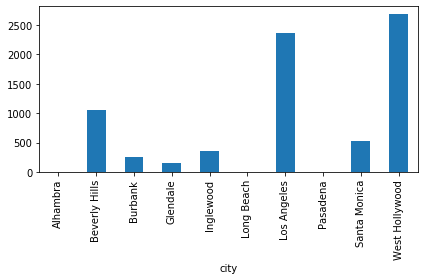

In [4]:
neighborhood['Average Crime']=round(merged_data.groupby(['city'])['crime counts'].mean(),1)
neighborhood
neighborhood["Average Crime"].plot(kind='bar')
plt.tight_layout()
plt.savefig('crime_city.png')

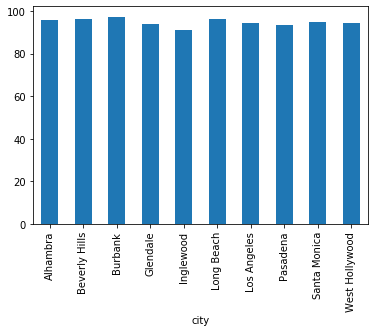

In [5]:
neighborhood['cleanliness']=round(merged_data.groupby(['city'])['review_scores_rating'].mean(),1)
neighborhood
neighborhood["cleanliness"].plot(kind='bar')

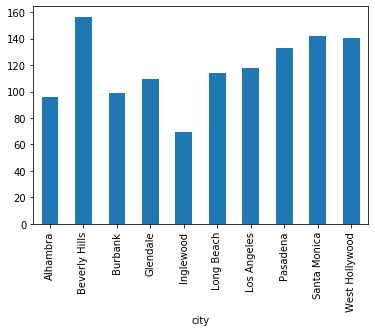

In [6]:
neighborhood['price']=round(merged_data.groupby(['city'])['price'].mean(),1)
neighborhood
neighborhood['price'].plot(kind='bar')
plt.savefig('price_city.png')

The r-squared is: 0.3934725401804935


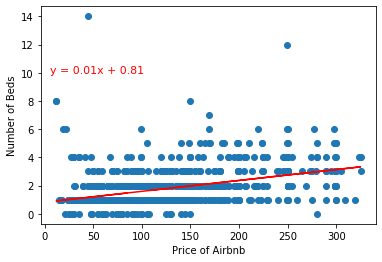

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = merged_data['price']
y_values = merged_data['beds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=11,color="red")
plt.xlabel('Price of Airbnb')
plt.fontsize=('12')
plt.ylabel('Number of Beds')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('price_beds.png')

Text(6, 10, 'y = 0.01x + 0.81')

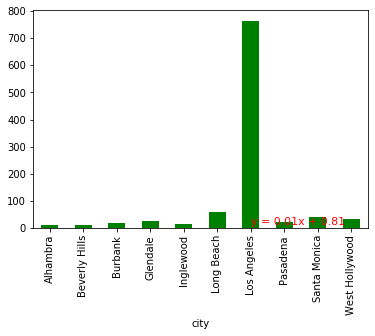

In [8]:
neighborhood['crime']=round(merged_data.groupby(['city'])['crime'].count(),1)
neighborhood["crime"].plot(kind='bar',color='green')
plt.annotate(line_eq,(6,10),fontsize=11,color="red")

The r-squared is: 0.5547908720341064


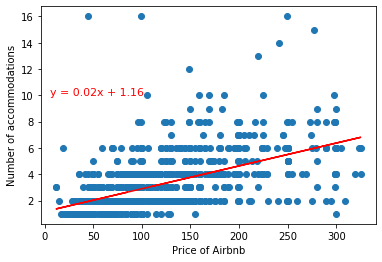

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = merged_data['price']
y_values = merged_data['accommodates']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=11,color="red")
plt.xlabel('Price of Airbnb')
plt.ylabel('Number of accommodations')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('price_accomidations.png')

The r-squared is: 0.05834470818392424


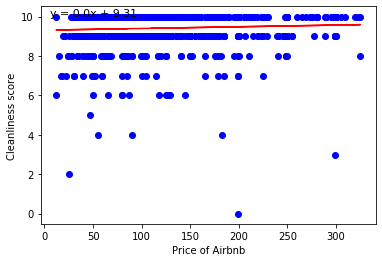

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = merged_data['price']
y_values = merged_data['review_scores_cleanliness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=11)
plt.xlabel('Price of Airbnb')
plt.ylabel('Cleanliness score')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('price_review.png')
